In this notebook, we examine some of the basic functionality of the `SSplines` library.
We start by importing some of the neccessary packages:

We now define the triangle which we want to evaluate splines over, and pass this to the `SplineSpace` constructor, with the desired spline degree.

In [1]:
import numpy as np
import SSplines

In [2]:
triangle = np.array([
    [0, 0],
    [1, 0],
    [0.5, np.sqrt(3)/2]
])

degree = 2

In [3]:
S = SSplines.SplineSpace(triangle, degree)

`SplineSpace` objects carry a string representation, so we can print the object to retrieve some extra information about this specific spline space.

In [4]:
print(S)


Degree   : 2
Dimension: 12
Vertices : 
    v1: (0.0, 0.0)  
    v2: (1.0, 0.0)
    v3: (0.5, 0.8660254037844386)
        


This tells us that we need 12 coefficients to define spline in this specific space. Let's create a quadratic spline.

In [5]:
coefficients = np.array([-1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1])
s = S.function(coefficients)
print(type(s))

<class 'SSplines.spline_function.SplineFunction'>


The object `s` is now a callable `SplineFunction` object. We can now for instance evaluate this over the triangle, and visualize it using `matplotlib`. We use the convenient `sample_triangle` method for sampling uniformly spaced points in the triangle. The spline evaluation is fully vectorized, so we may evaluate the spline at all the points at once.

In [6]:
# the number of points correspond to the dimension of the bivariate polynomial space of degree 50. 
points = SSplines.sample_triangle(triangle, 50)
function_values = s(points)

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

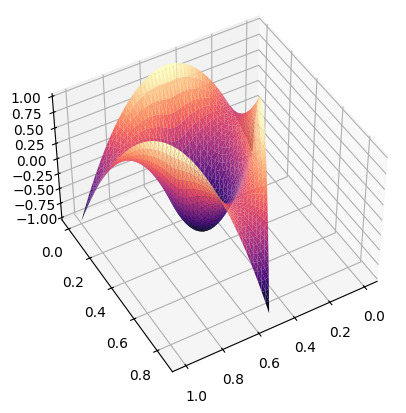

In [8]:
%matplotlib inline
fig = plt.figure()
axs = fig.add_subplot(projection='3d')

axs.view_init(45, 60)
axs.plot_trisurf(points[:, 0], points[:, 1], function_values, cmap=cm.magma)
plt.show()

Let us also plot the gradient of this specific spline function.

In [9]:
grad_values = s.grad(points)

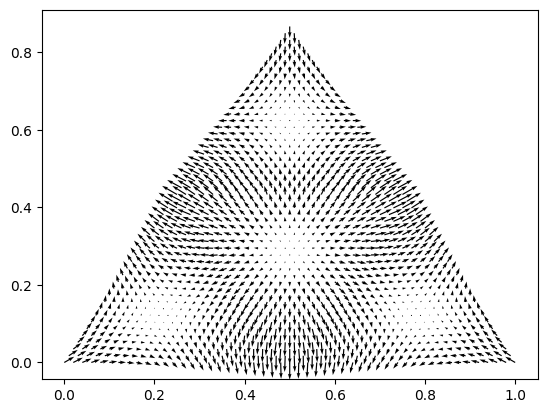

In [10]:
%matplotlib inline
plt.quiver(points[:, 0], points[:, 1], grad_values[:, 0], grad_values[:, 1])

Similarly, the `SplineFunction` object contains methods like `.lapl` and `.div` for specific differentiation operators. Or the more generic `.D` for directional derivatives of specific order, and `.dx` and `.dy` for partial derivatives. 